In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Deterministic spreading

In [176]:
G = nx.bipartite.complete_bipartite_graph(5, 3)
n = G.number_of_nodes()

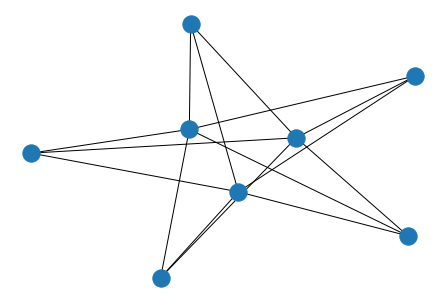

In [177]:
nx.draw(G)

In [178]:
dist = dict(nx.all_pairs_shortest_path_length(G))

In [193]:
def F(q): #Vectorize!! #Also, doesn't work|
    q = np.maximum(q, 1e-6)
    s = 0
    for i in range(len(prior)):
        for j in range(len(prior)):
            s+= q[i]/prior[i]*np.log(q[i]/q[j])
    return s

In [194]:
#Prior distribution of the seed nodes 
prior = np.array([1/n]*n)
#Node to test


In [195]:
T = 1

In [196]:
def infected(node, seed, t):
    return dist[node][seed] <= t

In [197]:
k = np.zeros(n)
for i in range(len(k)):
    for j in range(n):
        if infected(i,j,T):
            k[i]+=prior[j]

In [198]:
k

array([0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75])

In [199]:
for a in range(n):
    compatible_plus = np.zeros(n)
    for i in range(n):
        compatible_plus[i] = infected(a, i, T)

    posterior_unnormalized = np.multiply(compatible_plus, prior)
    posterior_positive = posterior_unnormalized/(np.sum(posterior_unnormalized)+1e-14)

    compatible_minus = 1-compatible_plus

    posterior_unnormalized = np.multiply(compatible_minus, prior)
    posterior_negative = posterior_unnormalized/(np.sum(posterior_unnormalized)+1e-14)    
    
    #print(posterior_positive)
    #print(posterior_negative)
    print(a,F(posterior_positive)*k[a]+F(posterior_negative)*(1-k[a]))
    

0 397.73332735933843
1 397.73332735933843
2 397.73332735933843
3 397.73332735933843
4 397.73332735933843
5 301.7521929468781
6 301.7521929468781
7 301.75219294687804
